In [1]:
using Statistics, Distributions, Plots, StatsPlots

println("Packages loaded.\n")

mutable struct Network
    Nodes::Vector{Int} # List of nodes
    Eadges::Vector{Vector{Int}} # List of edges
    KnList::Vector{Int} # List of degrees of nodes
    Lambda::Float64 # Average degree of nodes
    KnSTD::Float64 # Standard deviation of degree distribution
    KnDist::Distributions.Distribution # Degree distribution
end

function GetNeighbor(network::Network, n::Int)
    return [first.(TheNetwork.Eadges[findall(x -> x[2] == n, TheNetwork.Eadges)])...,
        last.(TheNetwork.Eadges[findall(x -> x[1] == n, TheNetwork.Eadges)])...]
end

function GetNetwork(N::Int, λ::Float64, KnDist::Distribution)
    nodes = collect(1:N)
    eadges = Vector{Int}[] # List of edges
    for _ ∈ nodes[1:2:end] # iterate over half of the nodes (each link will increase degree of two nodes)
        k_i = rand(KnDist) # Degree of the node
        n_k = 0
        while n_k != k_i # iterate over edges of the node
            eadge = rand(1:N, 2)
            if eadge ∉ eadges # check if the edge is not already in the list
                push!(eadges, eadge)
                n_k += 1
            end
        end
    end
    KnList = [count(x -> x[1] == i || x[2] == i, eadges) for i ∈ 1:N]
    Lambda = mean(KnList)
    KnSTD = std(KnList)
    return Network(nodes, eadges, KnList, Lambda, KnSTD, KnDist)
end
println("Functions defined.")

Packages loaded.

Functions defined.


# Results

## $\lambda = 1.0$

λ = 1.006, should be 1.0,
σ = 1.0057162355827072, should be 1.0
λ × N ÷ 2 = 5030, Number of links: 5030,
Maximum degree: 8,
Minimum degree: 0,
Size of the network in the memory: 482096 Bytes,
Great success!

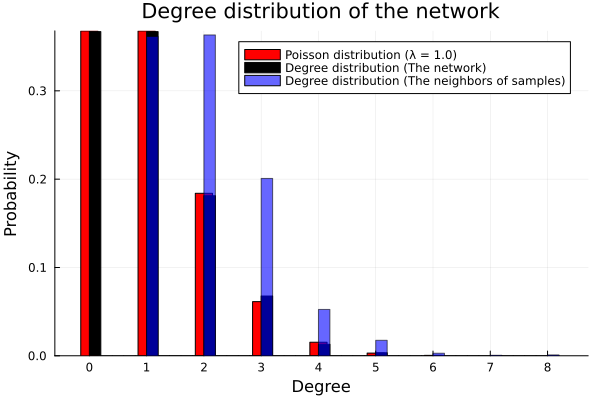

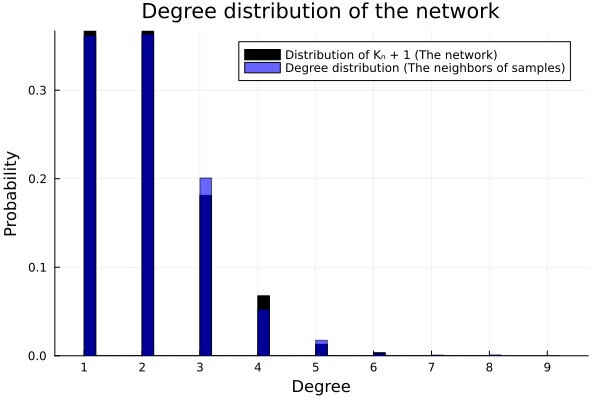

In [98]:
# Parameters
N = 10000 # Number of nodes
λ = 1.0 # Average degree of nodes
KnDist = Poisson(λ) # Degree distribution, replace it with any other distribution (in form of "Distributions" distribution) which gives you positive integer samples.
# Getting the network
TheNetwork = GetNetwork(N, λ, KnDist)
TheNetwork.Nodes
TheNetwork.Eadges
Neighbors = [GetNeighbor(TheNetwork, n) for n ∈ 1:N]
NeighborsDegrees = Int[]
for _ ∈ 1:10000
    append!(NeighborsDegrees, [TheNetwork.KnList[n] for n ∈ GetNeighbor(TheNetwork, rand(1:N))])
end

print("λ = $(TheNetwork.Lambda), should be $(mean(KnDist)),\nσ = $(TheNetwork.KnSTD), should be $(std(KnDist))\nλ × N ÷ 2 = $(round(Int, TheNetwork.Lambda * N / 2)), Number of links: $(length(TheNetwork.Eadges)),\nMaximum degree: $(maximum(TheNetwork.KnList)),\nMinimum degree: $(minimum(TheNetwork.KnList)),\nSize of the network in the memory: $(Base.summarysize(TheNetwork)) Bytes,\nGreat success!")

display(begin
    bar(KnDist, xticks=0:10, label="Poisson distribution (λ = $λ)", c=:red, bar_width=0.3)
    histogram!(TheNetwork.KnList, normalize=:probability, label="Degree distribution (The network)", xlabel="Degree", ylabel="Probability", title="Degree distribution of the network", c=:black, nbins=50)
    histogram!(NeighborsDegrees, normalize=:probability, label="Degree distribution (The neighbors of samples)", xlabel="Degree", ylabel="Probability", c=:blue, nbins=50, alpha=0.6)
end)
display(begin
    histogram(TheNetwork.KnList .+ 1, normalize=:probability, label="Distribution of Kₙ + 1 (The network)", xlabel="Degree", ylabel="Probability", title="Degree distribution of the network", c=:black, nbins=50)
    histogram!(NeighborsDegrees, xticks=0:10, normalize=:probability, label="Degree distribution (The neighbors of samples)", xlabel="Degree", ylabel="Probability", c=:blue, nbins=50, alpha=0.6)
end)

## $\lambda = 3.0$

λ = 2.9705, should be 3.0,
σ = 1.7189314187954827, should be 1.7320508075688772
λ × N ÷ 2 = 14852, Number of links: 14853,
Maximum degree: 11,
Minimum degree: 0,
Size of the network in the memory: 1110768 Bytes,
Great success!

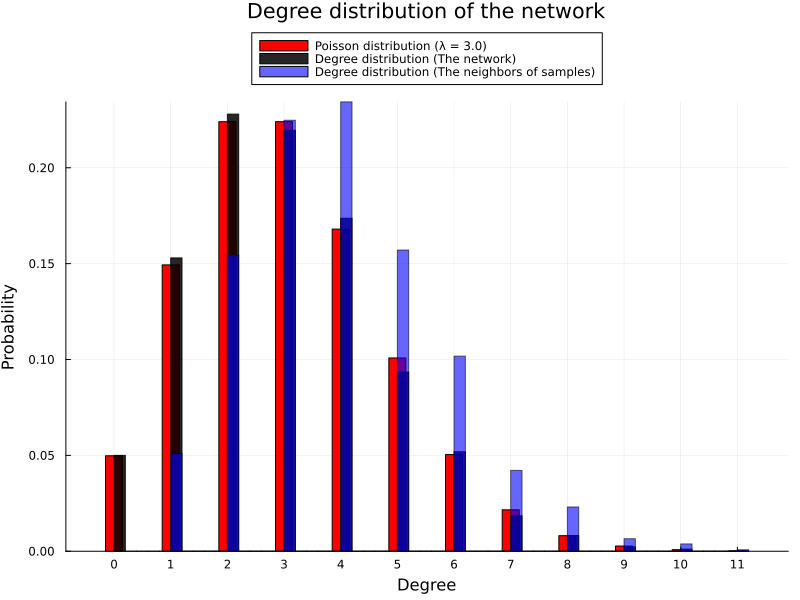

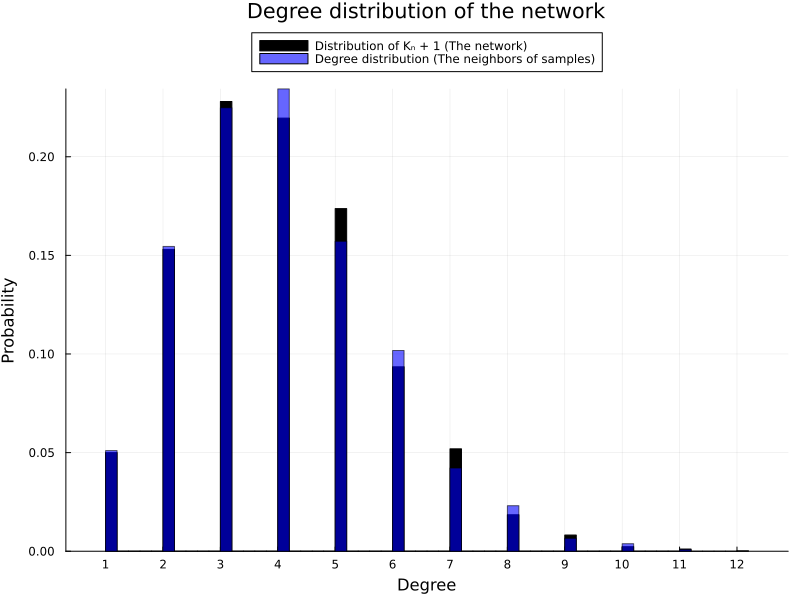

In [117]:
# Parameters
N = 10000 # Number of nodes
λ = 3.0 # Average degree of nodes
KnDist = Poisson(λ) # Degree distribution, replace it with any other distribution (in form of "Distributions" distribution) which gives you positive integer samples.
# Getting the network
TheNetwork = GetNetwork(N, λ, KnDist)
TheNetwork.Nodes
TheNetwork.Eadges
Neighbors = [GetNeighbor(TheNetwork, n) for n ∈ 1:N]
NeighborsDegrees = Int[]
for _ ∈ 1:10000
    append!(NeighborsDegrees, [TheNetwork.KnList[n] for n ∈ GetNeighbor(TheNetwork, rand(1:N))])
end

print("λ = $(TheNetwork.Lambda), should be $(mean(KnDist)),\nσ = $(TheNetwork.KnSTD), should be $(std(KnDist))\nλ × N ÷ 2 = $(round(Int, TheNetwork.Lambda * N / 2)), Number of links: $(length(TheNetwork.Eadges)),\nMaximum degree: $(maximum(TheNetwork.KnList)),\nMinimum degree: $(minimum(TheNetwork.KnList)),\nSize of the network in the memory: $(Base.summarysize(TheNetwork)) Bytes,\nGreat success!")

display(begin
    bar(KnDist, xticks=0:12, label="Poisson distribution (λ = $λ)", c=:red, bar_width=0.3)
    histogram!(TheNetwork.KnList, normalize=:probability, label="Degree distribution (The network)", xlabel="Degree", ylabel="Probability", title="Degree distribution of the network", c=:black, nbins=50, alpha=0.85)
    histogram!(NeighborsDegrees, normalize=:probability, label="Degree distribution (The neighbors of samples)", xlabel="Degree", ylabel="Probability", c=:blue, nbins=50, alpha=0.6, legend=:outertop, size=(800, 600))
end)
display(begin
    histogram(TheNetwork.KnList .+ 1, normalize=:probability, label="Distribution of Kₙ + 1 (The network)", xlabel="Degree", ylabel="Probability", title="Degree distribution of the network", c=:black, nbins=50)
    histogram!(NeighborsDegrees, xticks=0:12, normalize=:probability, label="Degree distribution (The neighbors of samples)", xlabel="Degree", ylabel="Probability", c=:blue, nbins=50, alpha=0.6, legend=:outertop, size=(800, 600))
end)

## $\lambda = 5.0$

λ = 4.9951, should be 5.0,
σ = 2.2357942364150505, should be 2.23606797749979
λ × N ÷ 2 = 24976, Number of links: 24976,
Maximum degree: 15,
Minimum degree: 0,
Size of the network in the memory: 1758640 Bytes,
Great success!

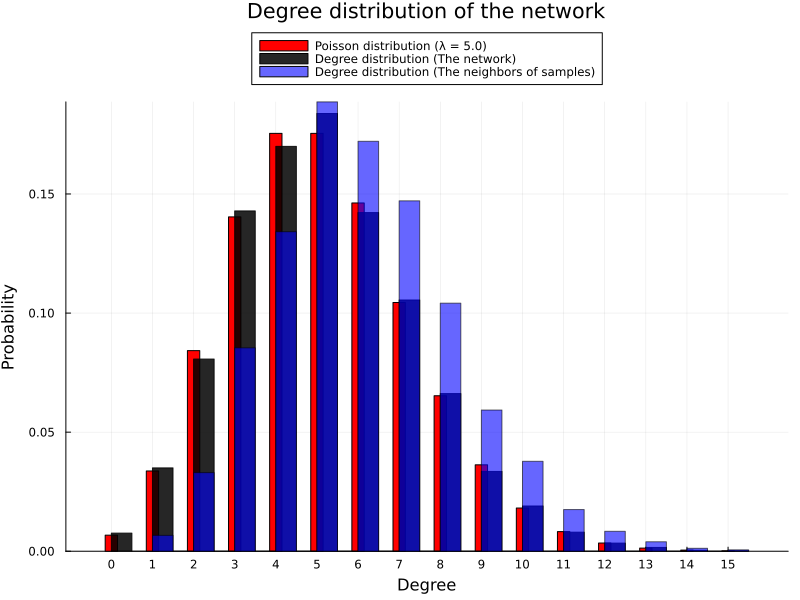

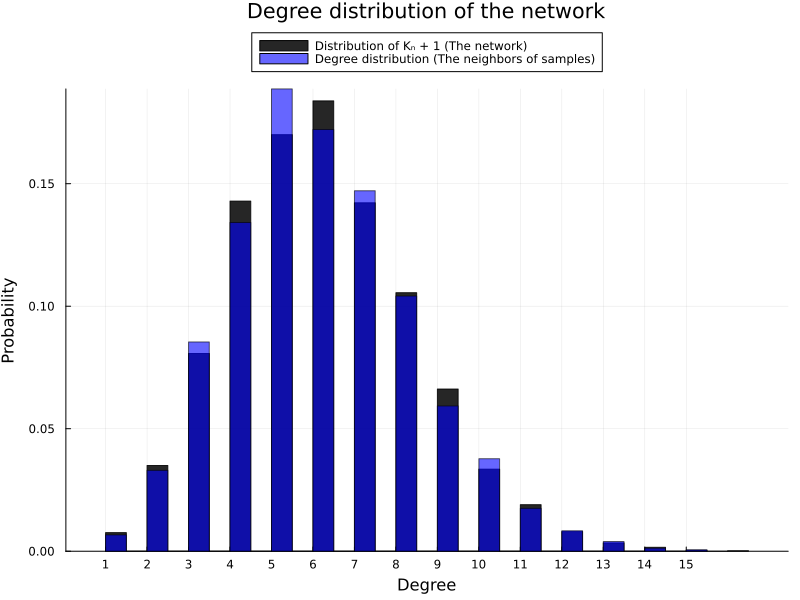

In [118]:
# Parameters
N = 10000 # Number of nodes
λ = 5.0 # Average degree of nodes
KnDist = Poisson(λ) # Degree distribution, replace it with any other distribution (in form of "Distributions" distribution) which gives you positive integer samples.
# Getting the network
TheNetwork = GetNetwork(N, λ, KnDist)
TheNetwork.Nodes
TheNetwork.Eadges
Neighbors = [GetNeighbor(TheNetwork, n) for n ∈ 1:N]
NeighborsDegrees = Int[]
for _ ∈ 1:10000
    append!(NeighborsDegrees, [TheNetwork.KnList[n] for n ∈ GetNeighbor(TheNetwork, rand(1:N))])
end

print("λ = $(TheNetwork.Lambda), should be $(mean(KnDist)),\nσ = $(TheNetwork.KnSTD), should be $(std(KnDist))\nλ × N ÷ 2 = $(round(Int, TheNetwork.Lambda * N / 2)), Number of links: $(length(TheNetwork.Eadges)),\nMaximum degree: $(maximum(TheNetwork.KnList)),\nMinimum degree: $(minimum(TheNetwork.KnList)),\nSize of the network in the memory: $(Base.summarysize(TheNetwork)) Bytes,\nGreat success!")

display(begin
    bar(KnDist, xticks=0:15, label="Poisson distribution (λ = $λ)", c=:red, bar_width=0.3)
    histogram!(TheNetwork.KnList, normalize=:probability, label="Degree distribution (The network)", xlabel="Degree", ylabel="Probability", title="Degree distribution of the network", c=:black, nbins=50, alpha=0.85)
    histogram!(NeighborsDegrees, normalize=:probability, label="Degree distribution (The neighbors of samples)", xlabel="Degree", ylabel="Probability", c=:blue, nbins=50, alpha=0.6, legend=:outertop, size=(800, 600))
end)
display(begin
    histogram(TheNetwork.KnList .+ 1, normalize=:probability, label="Distribution of Kₙ + 1 (The network)", xlabel="Degree", ylabel="Probability", title="Degree distribution of the network", c=:black, nbins=50, alpha=0.85)
    histogram!(NeighborsDegrees, xticks=0:15, normalize=:probability, label="Degree distribution (The neighbors of samples)", xlabel="Degree", ylabel="Probability", c=:blue, nbins=50, alpha=0.6, legend=:outertop, size=(800, 600))
end)

## $\lambda = 10.0$

λ = 10.0432, should be 10.0,
σ = 3.1251096606421838, should be 3.1622776601683795
λ × N ÷ 2 = 50216, Number of links: 50218,
Maximum degree: 24,
Minimum degree: 1,
Size of the network in the memory: 3374128 Bytes,
Great success!

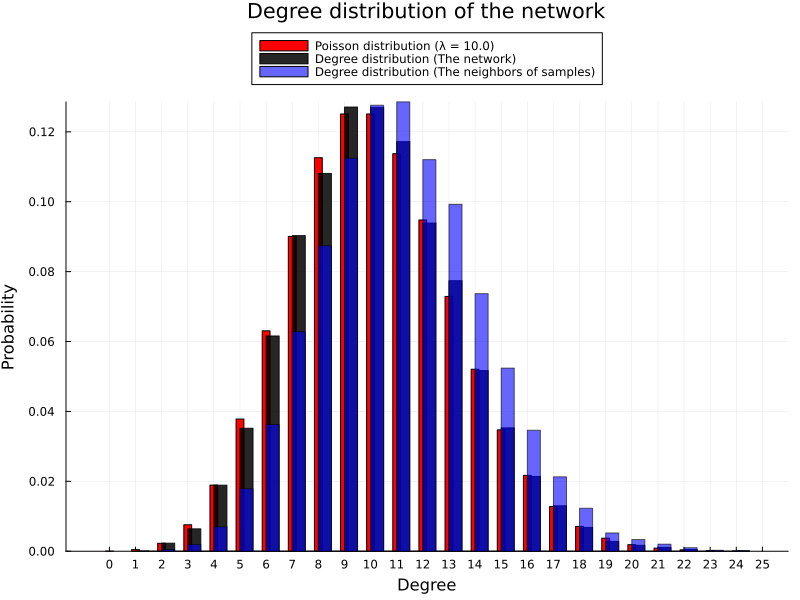

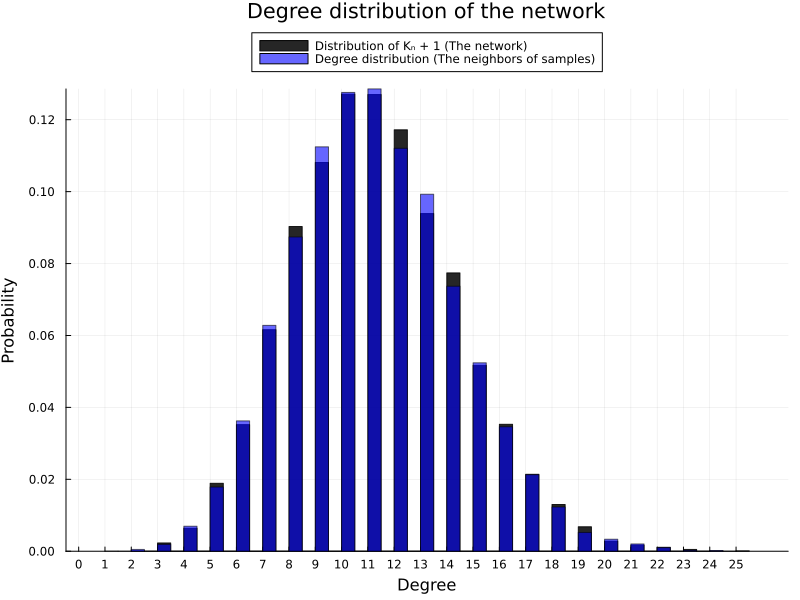

In [119]:
# Parameters
N = 10000 # Number of nodes
λ = 10.0 # Average degree of nodes
KnDist = Poisson(λ) # Degree distribution, replace it with any other distribution (in form of "Distributions" distribution) which gives you positive integer samples.
# Getting the network
TheNetwork = GetNetwork(N, λ, KnDist)
TheNetwork.Nodes
TheNetwork.Eadges
Neighbors = [GetNeighbor(TheNetwork, n) for n ∈ 1:N]
NeighborsDegrees = Int[]
for _ ∈ 1:10000
    append!(NeighborsDegrees, [TheNetwork.KnList[n] for n ∈ GetNeighbor(TheNetwork, rand(1:N))])
end

print("λ = $(TheNetwork.Lambda), should be $(mean(KnDist)),\nσ = $(TheNetwork.KnSTD), should be $(std(KnDist))\nλ × N ÷ 2 = $(round(Int, TheNetwork.Lambda * N / 2)), Number of links: $(length(TheNetwork.Eadges)),\nMaximum degree: $(maximum(TheNetwork.KnList)),\nMinimum degree: $(minimum(TheNetwork.KnList)),\nSize of the network in the memory: $(Base.summarysize(TheNetwork)) Bytes,\nGreat success!")

display(begin
    bar(KnDist, xticks=0:25, label="Poisson distribution (λ = $λ)", c=:red, bar_width=0.3)
    histogram!(TheNetwork.KnList, normalize=:probability, label="Degree distribution (The network)", xlabel="Degree", ylabel="Probability", title="Degree distribution of the network", c=:black, nbins=50, alpha=0.85)
    histogram!(NeighborsDegrees, normalize=:probability, label="Degree distribution (The neighbors of samples)", xlabel="Degree", ylabel="Probability", c=:blue, nbins=50, alpha=0.6, legend=:outertop, size=(800, 600))
end)
display(begin
    histogram(TheNetwork.KnList .+ 1, normalize=:probability, label="Distribution of Kₙ + 1 (The network)", xlabel="Degree", ylabel="Probability", title="Degree distribution of the network", c=:black, nbins=50)
    histogram!(NeighborsDegrees, xticks=0:25, normalize=:probability, label="Degree distribution (The neighbors of samples)", xlabel="Degree", ylabel="Probability", c=:blue, nbins=50, alpha=0.6, legend=:outertop, size=(800, 600))
end)

## $\lambda = 50.0$

λ = 50.0733, should be 50.0,
σ = 7.060517842284666, should be 7.0710678118654755
λ × N ÷ 2 = 250367, Number of links: 250381,
Maximum degree: 80,
Minimum degree: 25,
Size of the network in the memory: 16184560 Bytes,
Great success!

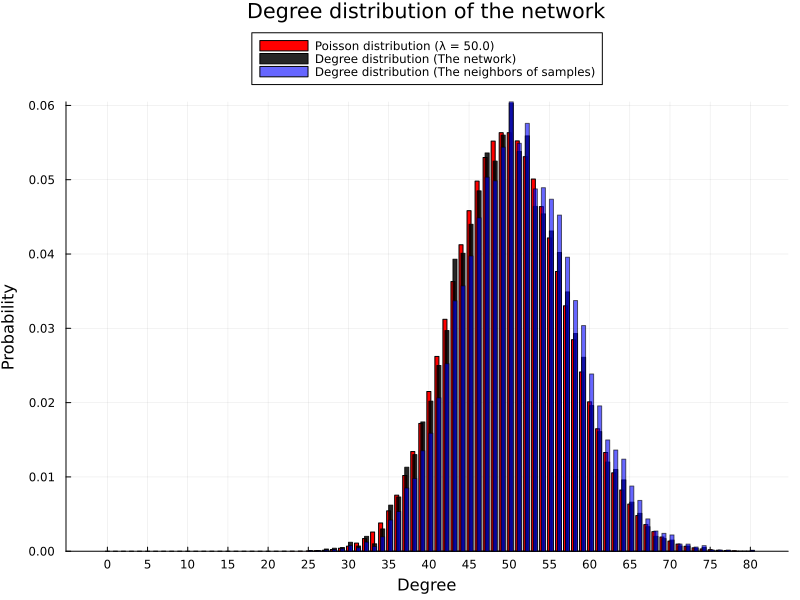

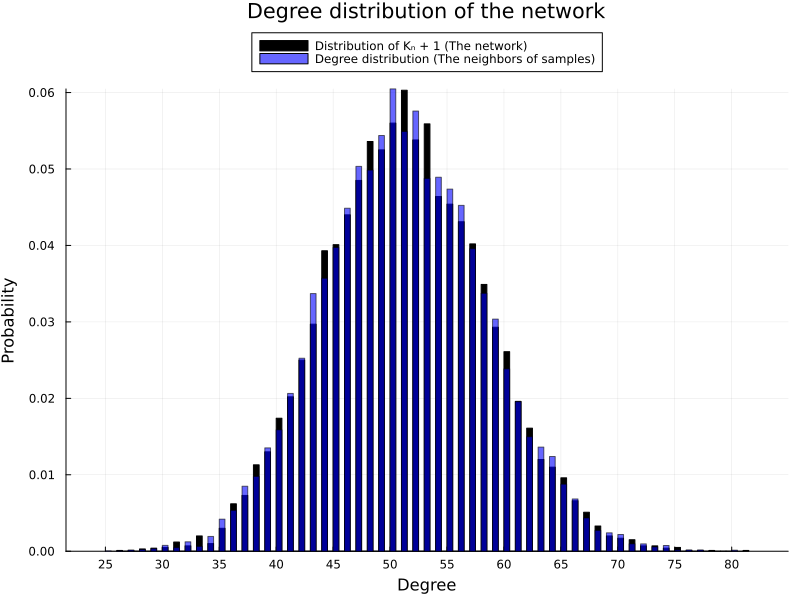

In [125]:
# Parameters
N = 10000 # Number of nodes
λ = 50.0 # Average degree of nodes
KnDist = Poisson(λ) # Degree distribution, replace it with any other distribution (in form of "Distributions" distribution) which gives you positive integer samples.
# Getting the network
TheNetwork = GetNetwork(N, λ, KnDist)
TheNetwork.Nodes
TheNetwork.Eadges
Neighbors = [GetNeighbor(TheNetwork, n) for n ∈ 1:N]
NeighborsDegrees = Int[]
for _ ∈ 1:10000
    append!(NeighborsDegrees, [TheNetwork.KnList[n] for n ∈ GetNeighbor(TheNetwork, rand(1:N))])
end

print("λ = $(TheNetwork.Lambda), should be $(mean(KnDist)),\nσ = $(TheNetwork.KnSTD), should be $(std(KnDist))\nλ × N ÷ 2 = $(round(Int, TheNetwork.Lambda * N / 2)), Number of links: $(length(TheNetwork.Eadges)),\nMaximum degree: $(maximum(TheNetwork.KnList)),\nMinimum degree: $(minimum(TheNetwork.KnList)),\nSize of the network in the memory: $(Base.summarysize(TheNetwork)) Bytes,\nGreat success!")

display(begin
    bar(KnDist, xticks=0:5:80, label="Poisson distribution (λ = $λ)", c=:red, bar_width=0.5)
    histogram!(TheNetwork.KnList, normalize=:probability, label="Degree distribution (The network)", xlabel="Degree", ylabel="Probability", title="Degree distribution of the network", c=:black, nbins=150, alpha=0.85)
    histogram!(NeighborsDegrees, normalize=:probability, label="Degree distribution (The neighbors of samples)", xlabel="Degree", ylabel="Probability", c=:blue, nbins=150, alpha=0.6, legend=:outertop, size=(800, 600))
end)
display(begin
    histogram(TheNetwork.KnList .+ 1, normalize=:probability, label="Distribution of Kₙ + 1 (The network)", xlabel="Degree", ylabel="Probability", title="Degree distribution of the network", c=:black, nbins=150)
    histogram!(NeighborsDegrees, xticks=0:5:80, normalize=:probability, label="Degree distribution (The neighbors of samples)", xlabel="Degree", ylabel="Probability", c=:blue, nbins=150, alpha=0.6, legend=:outertop, size=(800, 600))
end)

## Saving method:
I saved the network as a list of nodes and list of eadgesand there is no adjacency matrix.